In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def f(x):
    return (x-1)*(x-2)*(x-3)*(x-5)

def fprime(x):
    return 4*x**3-33*x**2+82*x-61

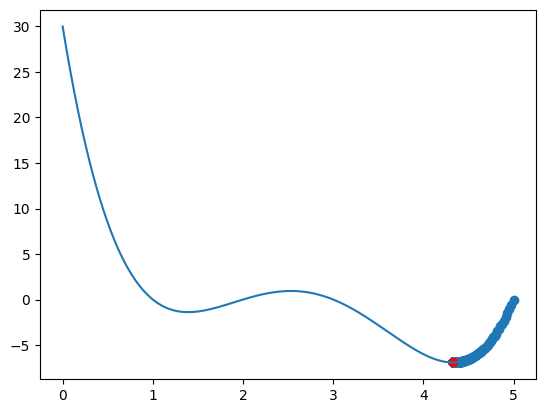

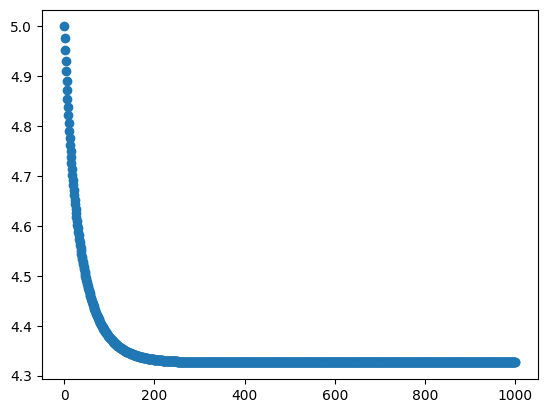

In [3]:

def DG(f,alpha,x0):
    e=[x0]
    #xi=x0+2*0.01
    xi=x0
    
    for i in range(1000):
        xi=xi-alpha*(f(xi))
        e.append(xi)
        
        
    return e

DG(fprime,0.001,5)
x=np.linspace(0,5,1000)
points=np.array(DG(fprime,0.001,5))
plt.figure()
plt.scatter(points,f(points))
i_min=points[1000]
plt.scatter(i_min,f(i_min),c='r')
plt.plot(x,f(x))
plt.figure()
plt.scatter(np.arange(1000+1),DG(fprime,0.001,5))


/tmp/ipykernel_3048/3342044119.py:5: RuntimeWarning: overflow encountered in double_scalars
  return 4*x**3-33*x**2+82*x-61
/tmp/ipykernel_3048/3342044119.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return 4*x**3-33*x**2+82*x-61
/tmp/ipykernel_3048/3342044119.py:2: RuntimeWarning: overflow encountered in multiply
  return (x-1)*(x-2)*(x-3)*(x-5)


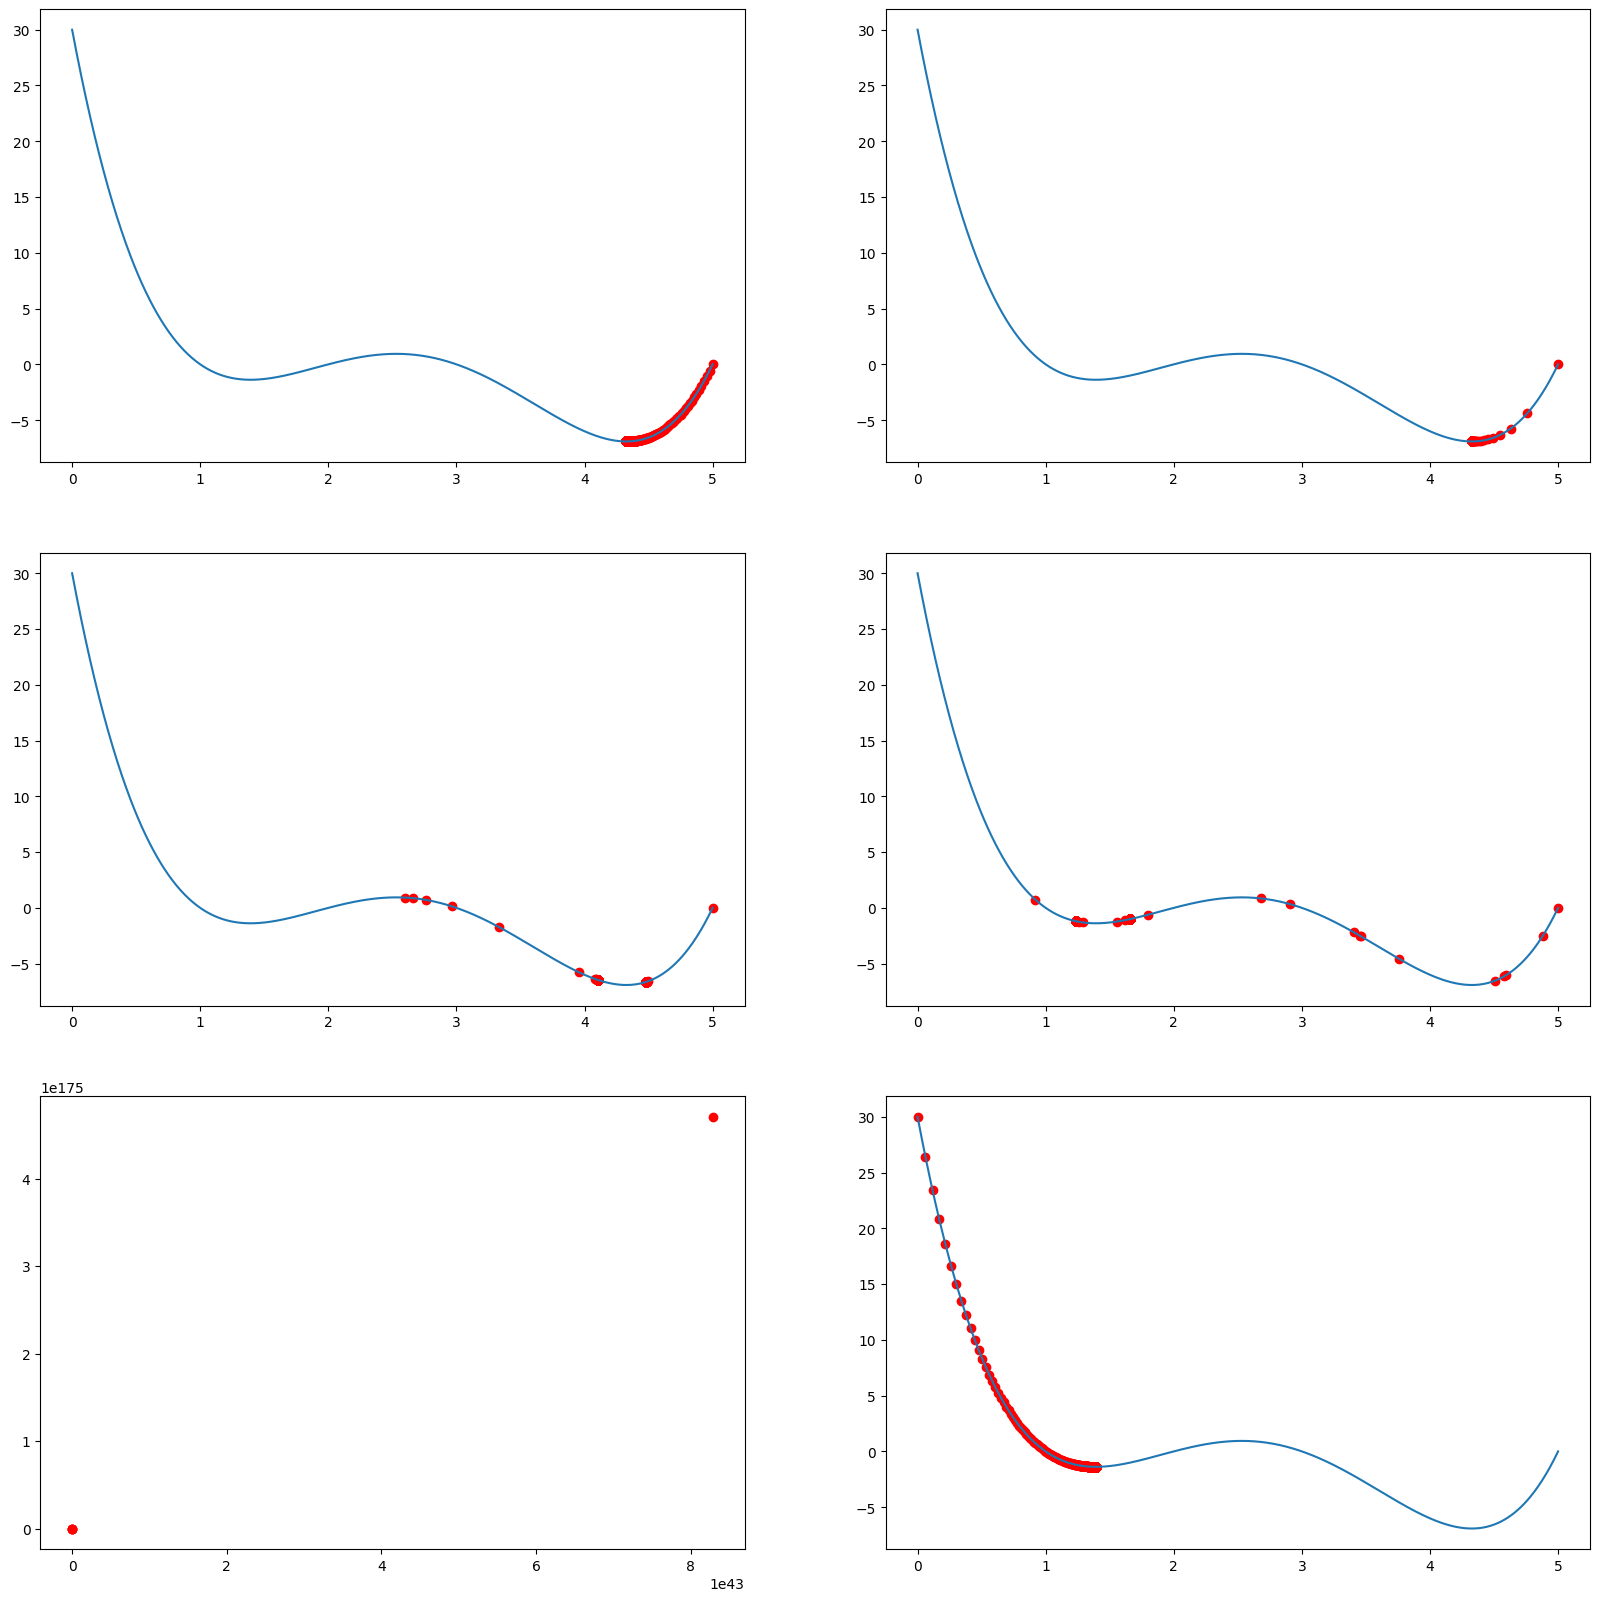

In [4]:

param=np.array([[(0.001,5),(0.01,5)],[(0.1,5),(0.17,5)],[(1,5),(0.001,0)]])



fig,ax=plt.subplots(3,2,figsize=(20,20))

for i in range(3):
     for j in range(2):
          x=np.linspace(0,5,1000)
          pts=np.array(DG(fprime,param[i,j][0],param[i,j][1]))
          #ax[i,j].scatter(x,f(x))
          ax[i,j].scatter(pts,f(pts),c='r')
          
          ax[i,j].plot(x,f(x))





## commentaires
l'algorithme trouve le minimum par descente de gradient si le pas n'est relativement pas très grand. Si le pas est très petit, il trouve quand même le minimum mais lentetement avec un nombre suffisamment grand d'itérations.
Si le pas est relativement grand, l'algorithme fait des sauts autour du minimum sans jamais le trouver.
Si le pas est "très grand", l'algorithme s'arrête dés qu'il est exécuté. Il va tomber sur des valeurs au voisinage de l'infini.

In [7]:
DG(fprime,0.001,5)[1000]

4.326345463587442

## Descente de gradient du modèle linéaire

* modèle linéaire

In [5]:
def model(X,theta):
    # on reécrit le modèle linéaire sous forme matricielle 
    # avec X les données d'entrainement et theta=(a,b)
    #X=np.concatenate((X,np.ones(X.shape)),axis=1)
    return X@theta

 * fonction de coût (à minimiser)

In [6]:
def cost_function(X,y,theta):
    return ((X@theta-y)**2).sum()

* Gradient

In [7]:
def gradient(X,y,theta):
    return (X.T@(X@theta-y))

* Descente de gradient

In [8]:
def grad_descent(X,y,alpha,n_iterations):
    theta=np.random.rand(2,1)
    for i in range(n_iterations):
        theta=theta-alpha*gradient(X,y,theta)
    return theta


## Tester notre modèle sur des de regression linéaire généréees aléatoirement

(100, 1)

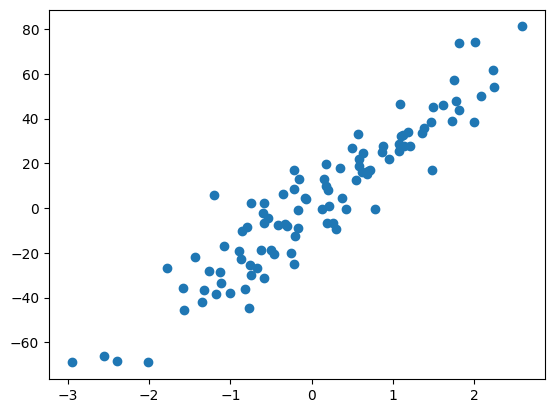

In [18]:
from sklearn.datasets import make_regression
from scipy.stats import linregress
X,y =make_regression(n_samples=100,n_features=1,noise=10)

plt.scatter(X,y)
X.shape
y=y.reshape((len(y),1))
y.shape

## Entrainer notre modèle sur les données générées avec différentes valeurs de pas et d'itérations

théta=[[26.16407229]
 [ 1.51047366]],coût_min=12583.057103839981
théta=[[26.16413986]
 [ 1.51027017]],coût_min=12583.057099359186
théta=[[26.16413986]
 [ 1.51027017]],coût_min=12583.057099359186
théta=[[26.16413986]
 [ 1.51027017]],coût_min=12583.057099359188
théta=[[nan]
 [nan]],coût_min=nan


/tmp/ipykernel_3048/831040260.py:2: RuntimeWarning: overflow encountered in matmul
  return (X.T@(X@theta-y))
/tmp/ipykernel_3048/831040260.py:2: RuntimeWarning: invalid value encountered in matmul
  return (X.T@(X@theta-y))


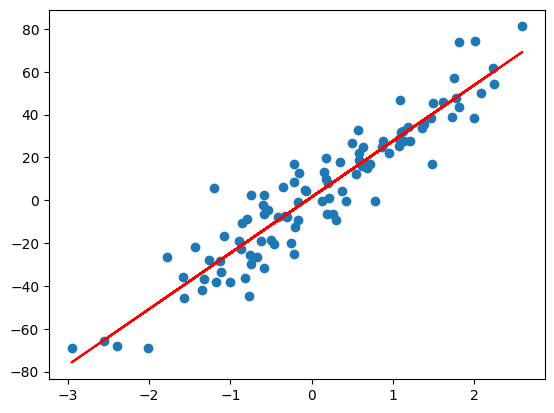

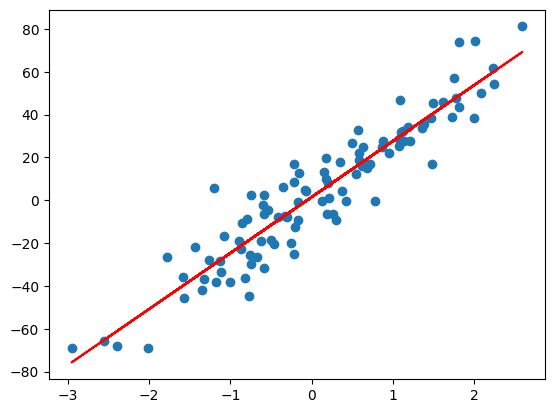

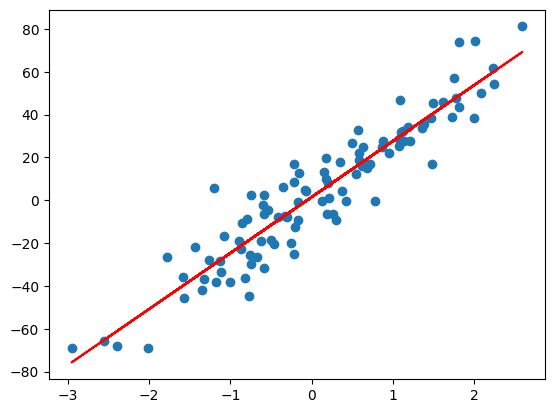

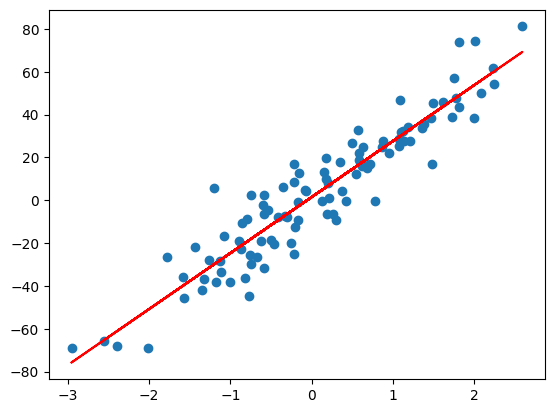

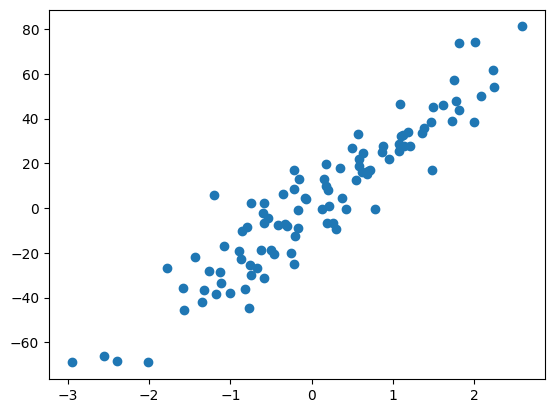

In [19]:
x=np.hstack((X,np.ones((X.shape))))
x.shape
params=[(0.001,100),(0.001,500),(0.001,1000),(0.01,1000),(1,1000)]

for i,j in enumerate(params):
    theta_i=grad_descent(x,y,j[0],j[1])
    model_i=model(x,theta_i)
    
    print(f"théta={theta_i},coût_min={cost_function(x,y,theta_i)}")
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X,model_i,c='r')

## Performance de notre modèle

In [20]:
def score_model(y,y_pred):
    ecart=((y_pred-y)**2).sum()
    ecart_moy=((y-y.mean())**2).sum()
    return 1-(ecart/ecart_moy)

score_model(y,model(x,grad_descent(x,y,0.01,1000)))

0.8778405879775233

## modèle linéaire de sklearn

0.8778405879775233


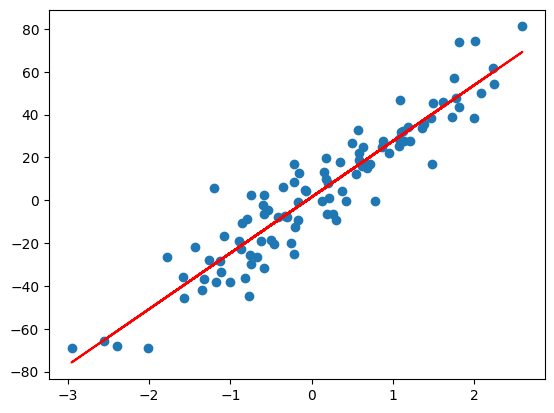

In [21]:
from sklearn.linear_model import LinearRegression
linr=LinearRegression().fit(X,y)
print(linr.score(X,y))
plt.scatter(X,y)
plt.plot(X,linr.predict(X),c='r')


Mon modèle a la même performance que celle de sklearn